In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import RandomOverSampler

import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.load("dataset_paper/X_train.npy")
y_train = np.load("dataset_paper/y_train.npy")
X_val = np.load("dataset_paper/X_val.npy")
y_val = np.load("dataset_paper/y_val.npy")

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_sample(X_train, y_train)
X_val, y_val = ros.fit_sample(X_val, y_val)

In [3]:
model = Sequential()
model.add(Dense(3, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 39        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


In [4]:
earlystop = EarlyStopping(monitor="val_acc", min_delta=0.0001, patience=10, verbose=1, mode="auto")
callbacks_list = [earlystop]
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, callbacks=callbacks_list)

Train on 9458 samples, validate on 2366 samples
Epoch 1/100
9458/9458 [==============================] - 1s 67us/step - loss: 0.5134 - acc: 0.8221 - val_loss: 0.2631 - val_acc: 0.9235
Epoch 2/100
9458/9458 [==============================] - 1s 54us/step - loss: 0.1795 - acc: 0.9505 - val_loss: 0.1532 - val_acc: 0.9480
Epoch 3/100
9458/9458 [==============================] - 0s 45us/step - loss: 0.1408 - acc: 0.9573 - val_loss: 0.1396 - val_acc: 0.9514
Epoch 4/100
9458/9458 [==============================] - 0s 51us/step - loss: 0.1323 - acc: 0.9605 - val_loss: 0.1323 - val_acc: 0.9573
Epoch 5/100
9458/9458 [==============================] - 0s 41us/step - loss: 0.1274 - acc: 0.9625 - val_loss: 0.1293 - val_acc: 0.9569
Epoch 6/100
9458/9458 [==============================] - 0s 42us/step - loss: 0.1238 - acc: 0.9628 - val_loss: 0.1270 - val_acc: 0.9573
Epoch 7/100
9458/9458 [==============================] - 0s 42us/step - loss: 0.1218 - acc: 0.9636 - val_loss: 0.1257 - val_acc: 0.9598


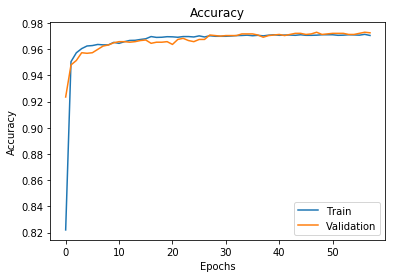

In [5]:
train_acc = history.history["acc"]
val_acc = history.history["val_acc"]

fig, ax = plt.subplots()
ax.plot(train_acc, label="Train")
ax.plot(val_acc, label="Validation")
ax.set(title="Accuracy", xlabel="Epochs", ylabel="Accuracy")
ax.legend()
plt.show()

In [6]:
model_json = model.to_json()
with open("models/mlp_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("models/mlp_model.h5")
print("Model saved")

Model saved
